### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Convertir cada DataFrame en lista de diccionarios
ventas = tienda.to_dict('records')
ventas2 = tienda2.to_dict('records')
ventas3 = tienda3.to_dict('records')
ventas4 = tienda4.to_dict('records')

# Calcular ingreso total
def ingreso_total(ventas):
    total = 0
    for venta in ventas:
        precio = venta['Precio']
        total += precio
    return total

In [3]:
# Ingresos de cada tienda
ingresos = [
            ('Tienda 1', ingreso_total(ventas)),
            ('Tienda 2',ingreso_total(ventas2)),
            ('Tienda 3',ingreso_total(ventas3)),
            ('Tienda 4',ingreso_total(ventas4))
            ]
for tienda, ingreso in ingresos:
  print(f'El ingreso de la {tienda} es: {ingreso}')


El ingreso de la Tienda 1 es: 1150880400.0
El ingreso de la Tienda 2 es: 1116343500.0
El ingreso de la Tienda 3 es: 1098019600.0
El ingreso de la Tienda 4 es: 1038375700.0


# 2. Ventas por categoría

In [4]:
# Calcular ventas por categoría
def ventas_por_categoria(ventas):
    categorias = {}
    for venta in ventas:
        categoria = venta['Categoría del Producto']
        if categoria in categorias:
            categorias[categoria] += 1
        else:
            categorias[categoria] = 1
    return categorias

# Ventas por categoría
categorias = [ventas_por_categoria(ventas), ventas_por_categoria(ventas2), ventas_por_categoria(ventas3), ventas_por_categoria(ventas4)]


In [5]:
# Categorías más populares
def top_categorias(categorias, tienda):
    print(f"\n Categorías más populares en {tienda}:")
    ordenadas = sorted(categorias.items(), key=lambda x: x[1], reverse=True)
    for categoria, cantidad in ordenadas:
        print(f"{categoria}: {cantidad} ventas")

tiendas_categorias = [('Tienda 1', categorias[0]), ('Tienda 2', categorias[1]), ('Tienda 3', categorias[2]), ('Tienda 4', categorias[3])]

for tienda, categorias in tiendas_categorias:
    top_categorias(categorias, tienda)


 Categorías más populares en Tienda 1:
Muebles: 465 ventas
Electrónicos: 448 ventas
Juguetes: 324 ventas
Electrodomésticos: 312 ventas
Deportes y diversión: 284 ventas
Instrumentos musicales: 182 ventas
Libros: 173 ventas
Artículos para el hogar: 171 ventas

 Categorías más populares en Tienda 2:
Muebles: 442 ventas
Electrónicos: 422 ventas
Juguetes: 313 ventas
Electrodomésticos: 305 ventas
Deportes y diversión: 275 ventas
Instrumentos musicales: 224 ventas
Libros: 197 ventas
Artículos para el hogar: 181 ventas

 Categorías más populares en Tienda 3:
Muebles: 499 ventas
Electrónicos: 451 ventas
Juguetes: 315 ventas
Electrodomésticos: 278 ventas
Deportes y diversión: 277 ventas
Libros: 185 ventas
Instrumentos musicales: 177 ventas
Artículos para el hogar: 177 ventas

 Categorías más populares en Tienda 4:
Muebles: 480 ventas
Electrónicos: 451 ventas
Juguetes: 338 ventas
Deportes y diversión: 277 ventas
Electrodomésticos: 254 ventas
Artículos para el hogar: 201 ventas
Libros: 187 ventas

# 3. Calificación promedio de la tienda


In [6]:
# Cálculo de la calificación promedio de la tienda
def promedio_calificacion(ventas):
    total = 0
    cantidad = 0
    for venta in ventas:
        calificacion = venta['Calificación']
        total += calificacion
        cantidad += 1
    return total / cantidad if cantidad > 0 else 0

In [7]:
# Calcular promedio por tienda
promedios = [
    ("Tienda 1", promedio_calificacion(ventas)),
    ("Tienda 2", promedio_calificacion(ventas2)),
    ("Tienda 3", promedio_calificacion(ventas3)),
    ("Tienda 4", promedio_calificacion(ventas4))
]

# Mostrar resultados
for tienda, promedio in promedios:
    print(f"{tienda}: {promedio:.2f} estrellas promedio")

Tienda 1: 3.98 estrellas promedio
Tienda 2: 4.04 estrellas promedio
Tienda 3: 4.05 estrellas promedio
Tienda 4: 4.00 estrellas promedio


# 4. Productos más y menos vendidos

In [8]:
# Contar ventas por productos
def ventas_por_producto(ventas):
    productos = {}
    for venta in ventas:
        producto = venta['Producto']
        if producto in productos:
            productos[producto] += 1
        else:
            productos[producto] = 1
    return productos

# Lista de tiendas con sus productos
tiendas_productos = [
    ("Tienda 1", ventas_por_producto(ventas)),
    ("Tienda 2", ventas_por_producto(ventas2)),
    ("Tienda 3", ventas_por_producto(ventas3)),
    ("Tienda 4", ventas_por_producto(ventas4))
]

In [9]:
# Mostrar el producto más y menos vendido por tienda
for tienda, productos in tiendas_productos:
    print(f'\n {tienda}')
    ordenados = sorted(productos.items(), key=lambda x: x[1], reverse=True)

    mas_vendido = ordenados[0]
    menos_vendido = ordenados[-1]

    print(f' Más vendido: {mas_vendido[0]} ({mas_vendido[1]} ventas)')
    print(f' Menos vendido: {menos_vendido[0]} ({menos_vendido[1]} ventas)')


 Tienda 1
 Más vendido: Microondas (60 ventas)
 Menos vendido: Celular ABXY (33 ventas)

 Tienda 2
 Más vendido: Iniciando en programación (65 ventas)
 Menos vendido: Juego de mesa (32 ventas)

 Tienda 3
 Más vendido: Kit de bancas (57 ventas)
 Menos vendido: Bloques de construcción (35 ventas)

 Tienda 4
 Más vendido: Cama box (62 ventas)
 Menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [10]:
# Cálculo del envio promedio por tienda
def costo_envio_promedio(ventas):
    total = 0
    cantidad = 0
    for venta in ventas:
        costo_envio = venta['Costo de envío']
        total += costo_envio
        cantidad += 1
    return total / cantidad if cantidad > 0 else 0

In [11]:
# Calcular costo de envio promedio por tienda
costo_promedios = [
    ("Tienda 1", costo_envio_promedio(ventas)),
    ("Tienda 2", costo_envio_promedio(ventas2)),
    ("Tienda 3", costo_envio_promedio(ventas3)),
    ("Tienda 4", costo_envio_promedio(ventas4))
]

# Mostrar resultados
for tienda, costo_promedio in costo_promedios:
    print(f"{tienda} tiene un costo promedio de: {costo_promedio:.2f}")

Tienda 1 tiene un costo promedio de: 26018.61
Tienda 2 tiene un costo promedio de: 25216.24
Tienda 3 tiene un costo promedio de: 24805.68
Tienda 4 tiene un costo promedio de: 23459.46


# VISUALIZACIÓN

In [12]:
import matplotlib.pyplot as plt


# Resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

# Ingresos por Tienda y Calificación Promedio

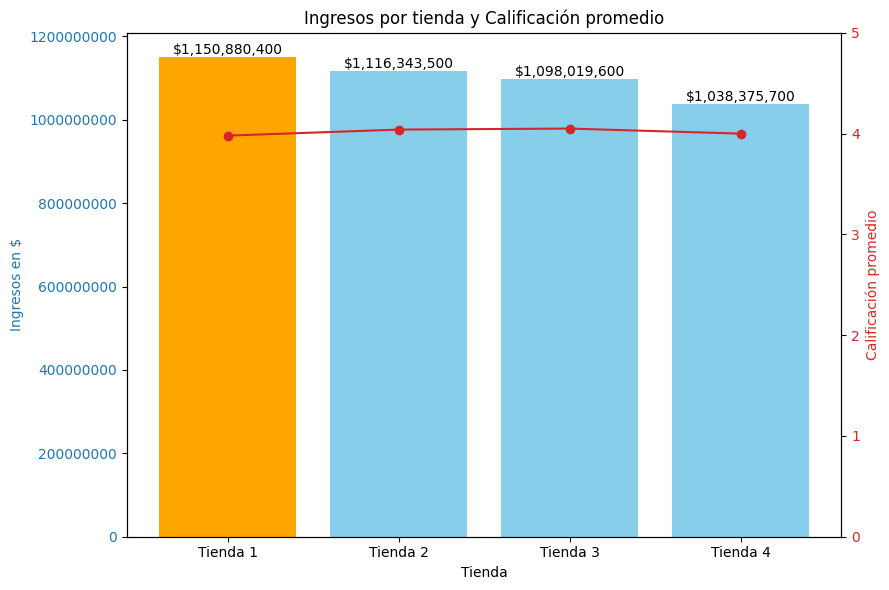

In [13]:
ingresos = {
             'Tienda 1': 1150880400.0,
             'Tienda 2': 1116343500.0,
             'Tienda 3': 1098019600.0,
             'Tienda 4': 1038375700.0
            }
calificaciones = {
    'Tienda 1': 3.98,
    'Tienda 2': 4.04,
    'Tienda 3': 4.05,
    'Tienda 4': 4.00
}

# Ingresos y Calificación Promedio por Tienda
tiendas = list(ingresos.keys())
vals_ing = list(ingresos.values())
vals_cal = [calificaciones[t] for t in tiendas]

max_tienda = max(ingresos, key=ingresos.get)

fig, ax1 = plt.subplots(figsize=(9, 6))

barras = []
for tienda, valor in ingresos.items():
    if tienda == max_tienda:
        barras.append(ax1.bar(tienda, valor, color="orange"))
    else:
        barras.append(ax1.bar(tienda, valor, color="skyblue"))

ax1.set_xlabel("Tienda")
ax1.set_ylabel("Ingresos en $", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title("Ingresos por tienda y Calificación promedio")

for barra_list in barras:
    barra = barra_list[0]
    altura = barra.get_height()
    plt.text(
           barra.get_x() + barra.get_width()/2,
        altura,
        f'${altura:,.0f}',
        ha='center', va='bottom', fontsize=10
        )
# Línea de valoración en eje secundario
ax2 = ax1.twinx()
ax2.plot(tiendas, vals_cal, marker='o', linestyle='-', color="tab:red")
ax2.set_ylabel("Calificación promedio", color="tab:red")
ax2.set_ylim(0, 5)
ax2.tick_params(axis='y', labelcolor="tab:red")

fig.tight_layout()
plt.show()

# Ventas por categoría

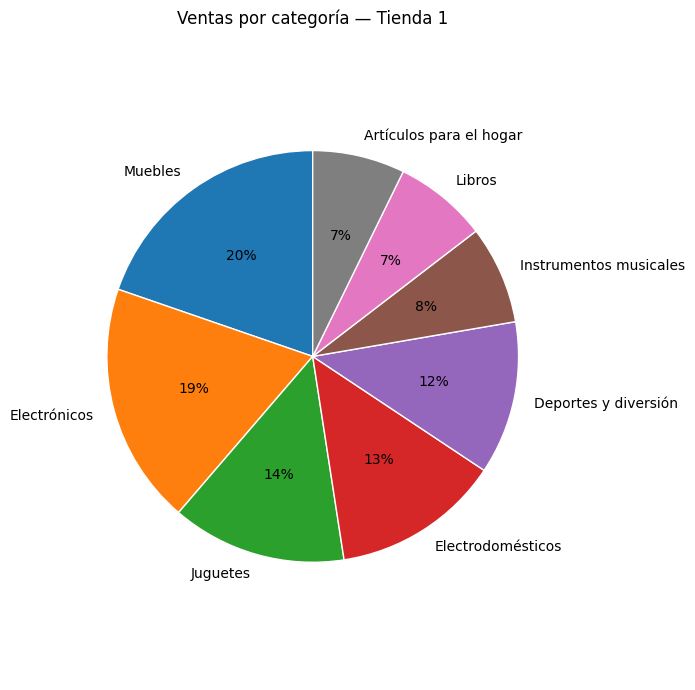

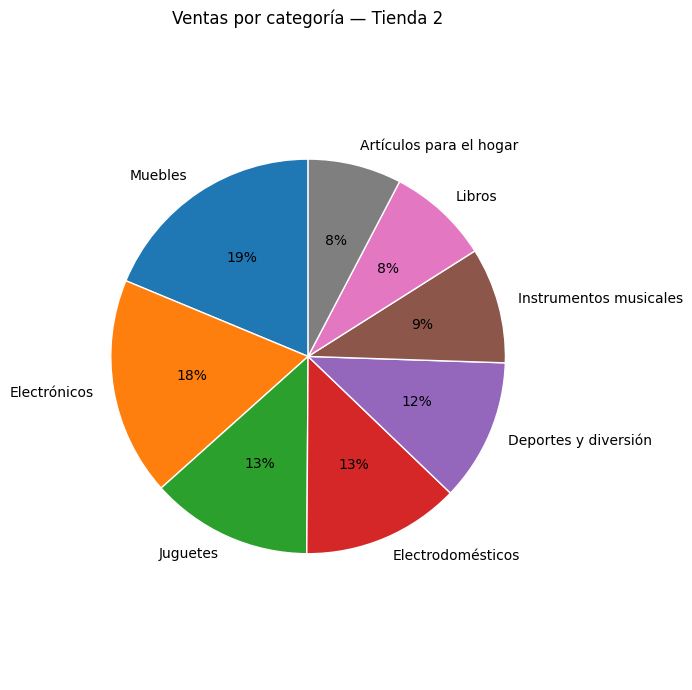

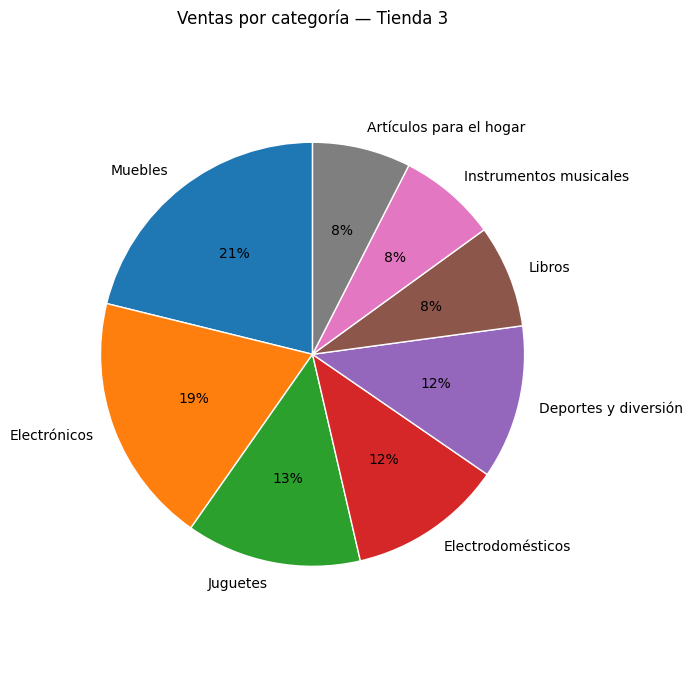

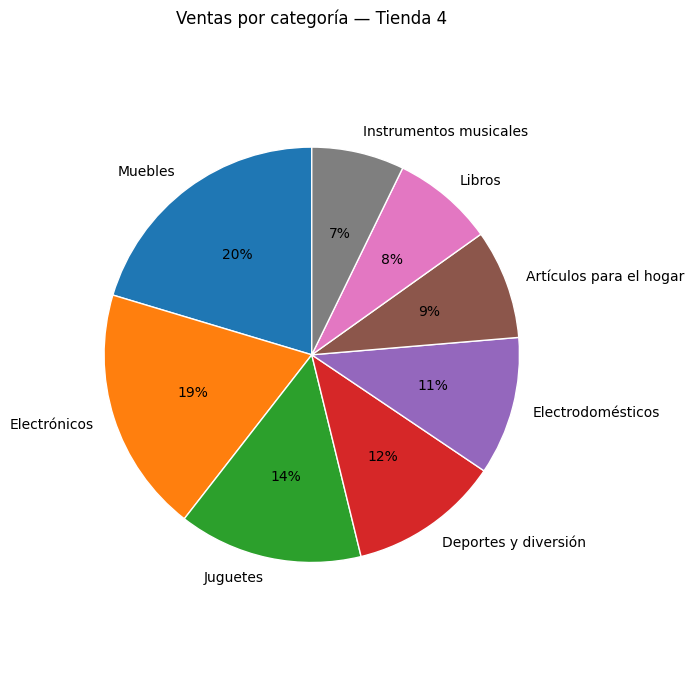

In [22]:
# 1) Conteos por categoría para cada tienda
categorias = [
    ventas_por_categoria(ventas),
    ventas_por_categoria(ventas2),
    ventas_por_categoria(ventas3),
    ventas_por_categoria(ventas4)
]

tiendas_categorias = [
    ("Tienda 1", categorias[0]),
    ("Tienda 2", categorias[1]),
    ("Tienda 3", categorias[2]),
    ("Tienda 4", categorias[3]),
]

def grafico_categorias_pie(nombre_tienda, categorias_dict, top_n=None):
    # Ordenar de mayor a menor
    ordenadas = sorted(categorias_dict.items(), key=lambda x: x[1], reverse=True)

    # Top N + "Otros"
    if top_n and len(ordenadas) > top_n:
        top = ordenadas[:top_n]
        resto = ordenadas[top_n:]
        otros_valor = sum(v for _, v in resto)
        if otros_valor > 0:
            top += [("Otros", otros_valor)]
        labels = [k for k, _ in top]
        values = [v for _, v in top]
    else:
        labels = [k for k, _ in ordenadas]
        values = [v for _, v in ordenadas]

    # Pie
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        values,
        labels=labels,
        autopct='%1.0f%%',    # porcentaje
        startangle=90,
        wedgeprops=dict(edgecolor='white')
    )
    plt.title(f"Ventas por categoría — {nombre_tienda}")
    plt.axis('equal')  # círculo perfecto
    plt.tight_layout()
    plt.show()

# 3) Generar un pie por tienda (top 3 categorías + 'Otros')
for nombre, cats in tiendas_categorias:
    grafico_categorias_pie(nombre, cats, top_n=None)

# Costo de envío promedio por Tienda

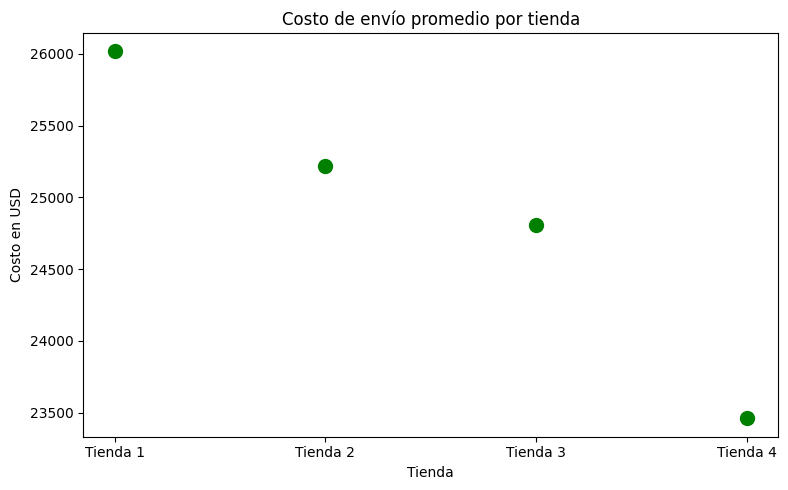

In [24]:

costos_envio = {
    'Tienda 1': 26018.61,
    'Tienda 2': 25216.24,
    'Tienda 3': 24805.68,
    'Tienda 4': 23459.46
}

plt.figure(figsize=(8, 5))

# Convertir claves a índices
tiendas = list(costos_envio.keys())
valores = list(costos_envio.values())
x_pos = list(range(len(tiendas)))

plt.scatter(x_pos, valores, s=100, color='green')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo en USD")
plt.xlabel("Tienda")
plt.xticks(x_pos, tiendas)
plt.tight_layout()
plt.show()

# Informe Final

  El presente informe tiene como objetivo ayudar al Sr. Juan a decidir qué tienda vender para invertir en un nuevo negocio. Para ello, se analizaron los datos de las cuatro tiendas de Alura Store, considerando cinco factores clave:


*   Ingresos totales por tienda
*   Categorías de productos más y menos vendidas
*   Calificaciones promedio de clientes
*   Productos más y menos vendidos
*   Costo promedio de envío

El análisis se realizó a partir de la información procesada en Python y visualizada mediante gráficos, lo que permitió comparar de forma objetiva el desempeño de cada tienda.


**1. Ingresos totales por tienda:**

  Los ingresos anuales muestran que la **Tienda 1** se perfila como la tienda con mejores ventas con un ingreso de 1.150.880.400 USD, seguida por la Tienda 2 y la Tienda 3. La **Tienda 4** presenta el menor nivel de facturación con 1.038.375.700 USD.

* Ranking por ingresos:

  1. Tienda 1 — $1.150.880.400

  2. Tienda 2 — $1.116.343.500

  3. Tienda 3 — $1.098.019.600

  4. Tienda 4 — $1.038.375.700

**2. Calificaciones promedio de clientes:**

La satisfacción del cliente es un factor crítico para la fidelización y el crecimiento del negocio. En este indicador, **la Tienda 3** obtiene la mejor valoración promedio **(4.05)**, mientras que **la Tienda 1** recibe la calificación más baja **(3.98)**.

* Ranking por calificación:

  1. Tienda 3 — 4.05

  2. Tienda 2 — 4.04

  3. Tienda 4 — 4.00

  4. Tienda 1 — 3.98

**3. Costo promedio de envío:**

Un menor costo de envío suele aumentar la competitividad y la conversión de ventas. **La Tienda 4** ofrece el menor costo promedio de envío **(23.459)**, mientras que la **Tienda 1** tiene el más alto **(26.019)**.

* Ranking por costo de envío (menor es mejor):

  1. Tienda 4 — $23.459

  2. Tienda 3 — $24.806

  3. Tienda 2 — $25.216

  4. Tienda 1 — $26.019

**4. Categorías de productos más vendidas:**

En todas las tiendas, la categoría **Muebles** lidera las ventas, seguida por **Electrónicos** y **Juguetes**. Sin embargo, se observan diferencias en la amplitud de la oferta y el volumen de ventas por categoría.

**La Tienda 3** destaca por ser la que más vende en las dos primeras categorías principales (Muebles: 499 ventas, Electrónicos: 451 ventas). **La Tienda 4**, a pesar de estar última en ingresos, mantiene volúmenes competitivos en estas categorías.

**5. Productos más y menos vendidos:**

* Tienda 1:

  - Más vendido: Microondas (60 ventas)

  - Menos vendido: Celular ABXY (33 ventas)

* Tienda 2:

  - Más vendido: Iniciando en programación (65 ventas)

  - Menos vendido: Juego de mesa (32 ventas)

* Tienda 3:

  - Más vendido: Kit de bancas (57 ventas)

  - Menos vendido: Bloques de construcción (35 ventas)

* Tienda 4:

  - Más vendido: Cama box (62 ventas)

  - Menos vendido: Guitarra eléctrica (33 ventas)

Se aprecia que la **Tienda 4**, aunque tiene un producto estrella con buenas ventas (Cama box), no logra compensar el bajo desempeño de su cartera de productos en otras categorías.


**Conclusión y recomendación**

Integrando los resultados de todas las métricas, **la Tienda 4** presenta el desempeño global más débil: **Es la de menor facturación anual.**

Su calificación promedio de clientes es aceptable pero no sobresaliente **(4.00)**.

Aunque ofrece el menor costo de envío, este factor no compensa el bajo nivel de ventas. Tiene un portafolio competitivo en categorías principales, pero su rendimiento global no alcanza al de las demás tiendas.

**Recomendación: El Sr. Juan debería vender la Tienda 4.**

Esta decisión se justifica porque, a pesar de tener un punto fuerte en costos de envío, sus ingresos son los más bajos, y no presenta ventajas significativas en satisfacción del cliente ni en diversificación de ventas que permitan proyectar un crecimiento sostenido frente a las demás tiendas.



